In [1]:
from __future__ import print_function
import numpy as np # Biblioteca de funciones matematicas de alto nivel
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
import keras  
import pandas as pd

In [2]:
dataset = pd.read_csv('Train.csv', encoding = "ISO-8859-1") # lectura de datos
dataset1 = pd.read_csv('Test.csv', encoding = "ISO-8859-1") # lectura de datos


In [3]:
dataset.replace([np.inf, -np.inf], -1, inplace=True) 
dataset.replace([np.nan, -np.nan], -1, inplace=True)

dataset1.replace([np.inf, -np.inf], -1, inplace=True) 
dataset1.replace([np.nan, -np.nan], -1, inplace=True)

In [4]:
#Eliminamos los datos mal introducidos
dataset = dataset.drop(dataset[dataset['Dst Port']=='Dst Port'].index)
dataset1 = dataset1.drop(dataset1[dataset1['Dst Port']=='Dst Port'].index)

#dataset = dataset[dataset['Flow IAT Min'] >= 0]
#dataset1 = dataset1[dataset1['Flow IAT Min'] >= 0]
#Eliminamos las columnas innecesarias

dataset = dataset.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min'], axis=1)
dataset1 = dataset1.drop(['Flow ID', 'Src IP', 'Src Port', 'Dst IP','Unnamed: 0','Dst Port','Fwd Seg Size Min'], axis=1)
#Quitamos direcciones IP dest y src para no introducir sesgos, lo mismo con los puertos
#Quitar el puerto de destino es una modificación con respecto al trabajo original
#Eliminamos la columna de timestamp para no tener sesgo
dataset1 = dataset1.drop(['Timestamp'], axis=1)
dataset = dataset.drop(['Timestamp'], axis=1)

#Eliminamos la columna 

In [5]:
n=0
for column in dataset:
    column
    if column != 'Label':
        dataset[column] = dataset[column].astype(float)
        
n=0
for column in dataset1:
    column
    if column != 'Label':
        dataset1[column] = dataset1[column].astype(float)


In [6]:
dataset.loc[(dataset.Label != 'Benign'),'Label']='Evil'
dataset1.loc[(dataset1.Label != 'Benign'),'Label']='Evil'
# Solo se utiliza para detectar malo o bueno

dataset = dataset.drop(dataset[dataset['Label'] == 'Evil'].sample(frac=.8).index)
dataset1 = dataset1.drop(dataset1[dataset1['Label'] == 'Evil'].sample(frac=.8).index)

dataset

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
5,6.0,3027007.0,12.0,15.0,350.0,188.0,85.0,0.0,29.166667,38.295106,...,6.0,0.0,0.0,0.0,0.0,1.641321e+15,8.996984e+05,1.641321e+15,1.641321e+15,Evil
9,6.0,3046644.0,12.0,15.0,351.0,188.0,86.0,0.0,29.250000,38.430871,...,6.0,0.0,0.0,0.0,0.0,1.641321e+15,9.024454e+05,1.641321e+15,1.641321e+15,Evil
10,6.0,408.0,2.0,1.0,79.0,0.0,79.0,0.0,39.500000,55.861436,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Evil
11,6.0,173.0,2.0,0.0,79.0,0.0,79.0,0.0,39.500000,55.861436,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Evil
14,6.0,1257.0,2.0,1.0,79.0,0.0,79.0,0.0,39.500000,55.861436,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Evil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430151,17.0,9264.0,1.0,1.0,47.0,63.0,47.0,47.0,47.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign
430152,0.0,91444297.0,51.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.614000e+15,2.329123e+14,1.646939e+15,2.016173e+07,Benign
430153,17.0,101164777.0,6.0,6.0,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,5.0,0.0,0.0,0.0,0.0,1.646939e+15,3.197853e+07,1.646939e+15,1.646939e+15,Benign
430154,17.0,101009912.0,6.0,6.0,1332.0,1032.0,222.0,222.0,222.000000,0.000000,...,5.0,0.0,0.0,0.0,0.0,1.646939e+15,3.191661e+07,1.646939e+15,1.646939e+15,Benign


In [7]:
Labels = dataset['Label'].unique()
Y_train = dataset["Label"]
Y_test =  dataset1["Label"]

In [8]:
X_train=dataset.iloc[:, 0:76] #Luego obtenemos las características del flujo
X_test=dataset1.iloc[:, 0:76]
features = list(X_train.columns)

In [9]:
from sklearn.preprocessing import LabelEncoder
 
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train) #para pasar a numeros
Y_train

Labels = lb_make.inverse_transform(Y_train)
Labels = list(lb_make.classes_)
Labels

['Benign', 'Evil']

In [10]:
lb_make = LabelEncoder()
Y_test = lb_make.fit_transform(Y_test)
Y_test
Labels1 = lb_make.inverse_transform(Y_test)
Labels1 = list(lb_make.classes_)
Labels1

['Benign', 'Evil']

In [11]:
dataset["Label"].value_counts()

Benign    121679
Evil       61695
Name: Label, dtype: int64

In [12]:
dataset1["Label"].value_counts()

Benign    32391
Evil      13920
Name: Label, dtype: int64

In [13]:
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [14]:

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

#scaler = MinMaxScaler().fit(X_train) # Normalizamos los datos
#trainX = scaler.transform(X_train) # Asi se representan los datos

#testT = scaler.transform(X_test)


In [15]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(16,12),activation='relu', max_iter=500,random_state=0)
)

In [16]:
X_trainArr=X_train.to_numpy()
Y_train
model.fit(X_trainArr,Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(16, 12), max_iter=500,
                               random_state=0))])

In [17]:
# evaluate the model Entrenamiento

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_trainArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr
y_test1 = []
for i in range(0, Y_train.size):
        if Y_train[i] == 1:
            y_test1.append("Evil")
        else:
            y_test1.append("Benign")
y_pred1 = []
for i in range(0, Y_pred.size):
        if Y_pred[i] == 1:
            y_pred1.append("Evil")
        else:
            y_pred1.append("Benign")


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1, digits=8, zero_division= "warn"))

              precision    recall  f1-score   support

      Benign  0.99707564 0.99754271 0.99730912    121679
        Evil  0.99514910 0.99422968 0.99468917     61695

    accuracy                      0.99642807    183374
   macro avg  0.99611237 0.99588620 0.99599915    183374
weighted avg  0.99642747 0.99642807 0.99642766    183374



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

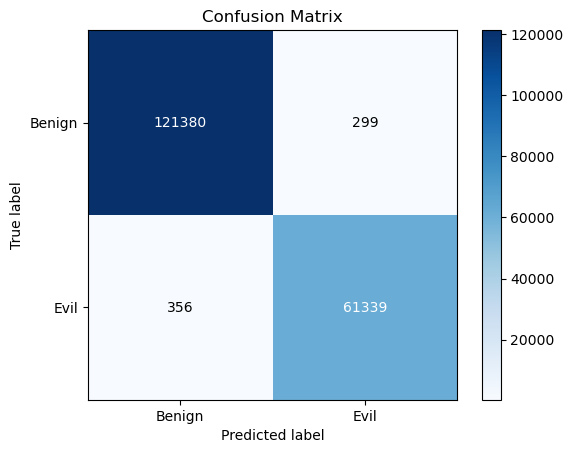

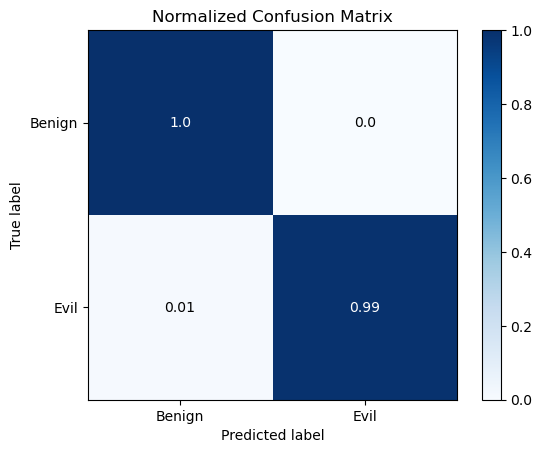

In [19]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test1, y_pred1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, normalize= True)

In [20]:
# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
X_testArr = X_test.to_numpy()
Y_pred=model.predict(X_testArr)
LabelsArr = np.array(Labels)
Labels
LabelsArr
y_test1 = []
for i in range(0, Y_test.size):
        if Y_test[i] == 1:
            y_test1.append("Evil")
        else:
            y_test1.append("Benign")
y_pred1 = []
for i in range(0, Y_pred.size):
        if Y_pred[i] == 1:
            y_pred1.append("Evil")
        else:
            y_pred1.append("Benign")
            



In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1, digits=8, zero_division= "warn"))



              precision    recall  f1-score   support

      Benign  0.99316022 0.99070730 0.99193224     32391
        Evil  0.97850000 0.98412356 0.98130372     13920

    accuracy                      0.98872838     46311
   macro avg  0.98583011 0.98741543 0.98661798     46311
weighted avg  0.98875370 0.98872838 0.98873756     46311



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

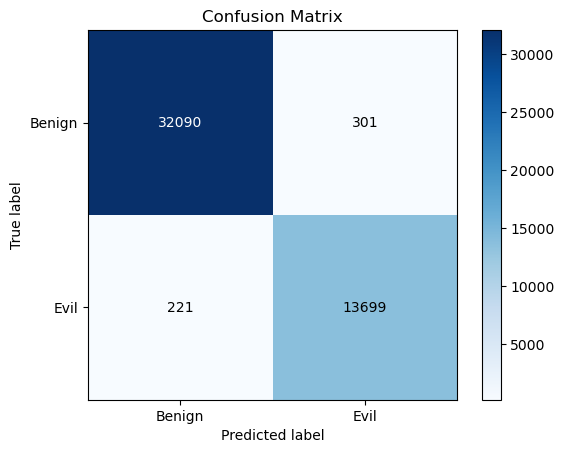

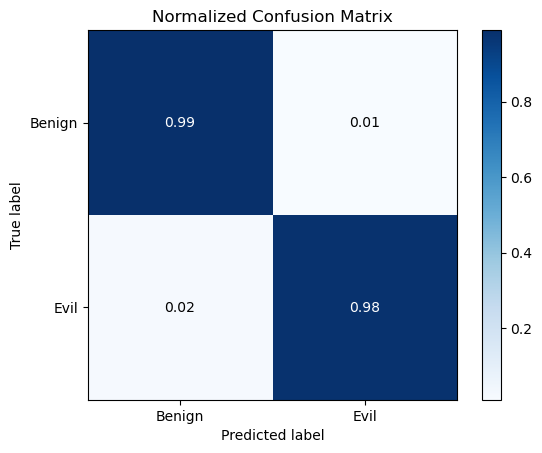

In [22]:

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred1, normalize= True)

In [23]:
size=200
data=shap.sample(X_trainArr, size)
explainer = shap.KernelExplainer(model.predict,data)
expected_value = explainer.expected_value
data1=shap.sample(X_testArr, size)
shap_values = explainer.shap_values(data1,nsamples=size)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [24]:
np.savetxt('test1.txt',shap_values)


shap_values = np.loadtxt('test1.txt')

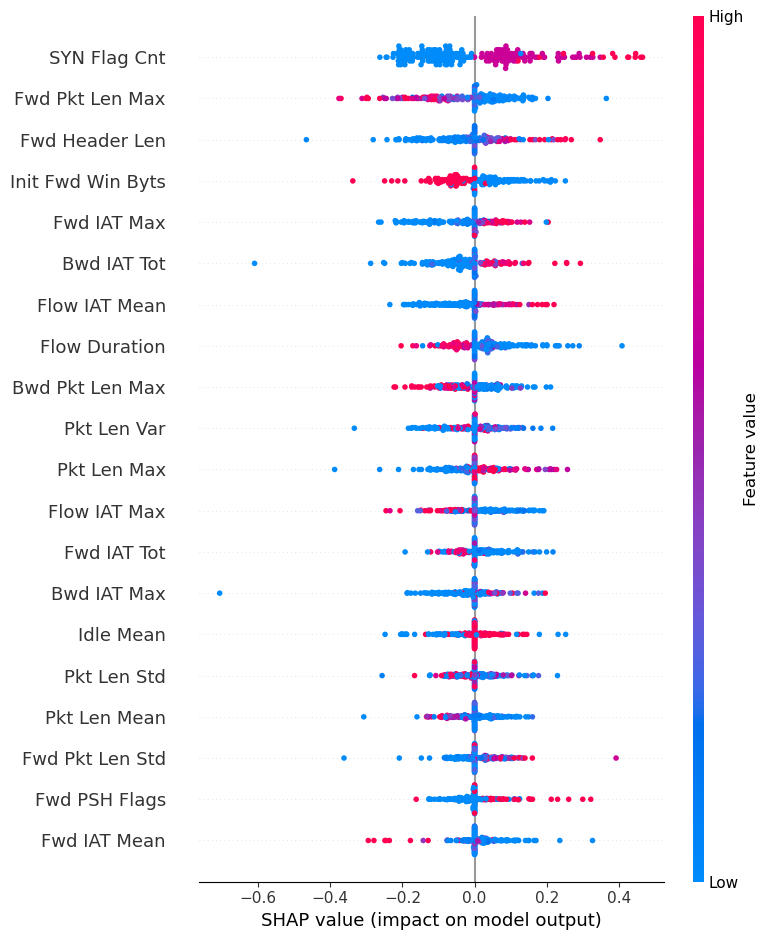

In [82]:
shap.summary_plot(shap_values,data1,feature_names=features,max_display=20)

(0.0, 300.0)

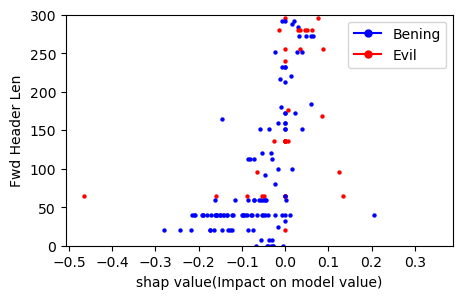

In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#Fwd Seg Size Min,Bwd Pkt Len Std, Fwd Pkt Len Std,Fwd PSH flags,SYN Flag Cnt, Pkt Len Var
caracteristica='Fwd Header Len'
pos=np.char.find(features,caracteristica, start=0, end=None)
pos =np.where(pos == 0)
pos = int(pos[0])
plt.rcParams["figure.figsize"] = (5,3)
y_preddata=model.predict(data1)

col =[]
x=shap_values[:,pos]
y= data1[:,pos]
for i in range(0, len(data1[:,pos])):
    if y_preddata[i]==0:
        col.append('blue')  
    else:
        col.append('red') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 10,linewidth = 0)

plt.ylabel(caracteristica) 
plt.xlabel('shap value(Impact on model value)') 
custom_lines = [Line2D([0], [0], marker='o', color='b', label='Bening', markersize=5),
                Line2D([0], [0], marker='o', color='r', label='Evil', markersize=5)]
plt.legend(handles= custom_lines,loc="best")
plt.ylim([0, 300])

(0.0, 400.0)

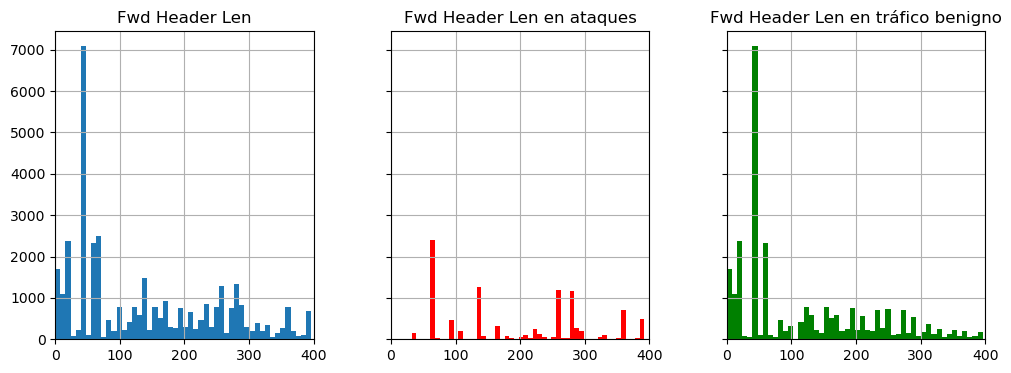

In [27]:
#Histograma del FWdSigSezSize

caracteris= 'Fwd Header Len'
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(12,4))
lim=400

pruebadf=dataset1.loc[dataset1[caracteris] < lim]
evildf=pruebadf.loc[pruebadf['Label'] == "Evil"]
Benigndf=pruebadf.loc[pruebadf['Label'] == "Benign"]

bin = 50


pruebadf.hist(column=caracteris, ax = ax[0],bins = bin)
evildf.hist(column=caracteris, ax = ax[1],color="red",bins = bin)
Benigndf.hist(column=caracteris, ax = ax[2],color="green",bins = bin)


ax[0].set_title(caracteris )
ax[1].set_title( caracteris+" en ataques")
ax[2].set_title(caracteris+ " en tráfico benigno")

ax[0].set_xlim([0, lim])

ax[1].set_xlim([0, lim])

ax[2].set_xlim([0, lim])

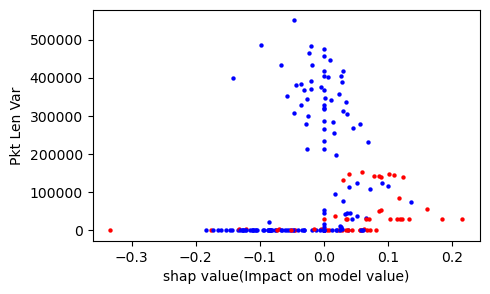

In [28]:
caracteristica='Pkt Len Var'
pos=np.char.find(features,caracteristica, start=0, end=None)
pos =np.where(pos == 0)
pos = int(pos[0])
plt.rcParams["figure.figsize"] = (5,3)

col =[]
x=shap_values[:,pos]
y= data1[:,pos]
for i in range(0, len(data1[:,pos])):
   if y_preddata[i]==0:
       col.append('blue')  
   else:
      col.append('red') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 10,linewidth = 0)

plt.ylabel(caracteristica) 
plt.xlabel('shap value(Impact on model value)') 
custom_lines = [Line2D([0], [0], marker='o', color='b', label='Bening', markersize=5),
                Line2D([0], [0], marker='o', color='r', label='Evil', markersize=5)]
#plt.legend(handles= custom_lines,loc="best")


In [29]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,data1,feature_names=features, out_names=Labels)



In [30]:
y_preddata=model.predict(data1)


In [31]:
num=104;

shap.force_plot(explainer.expected_value, shap_values[num,:]  ,data1[num,:],feature_names=features, figsize=[15,28])
#1 maligno #0 benigno

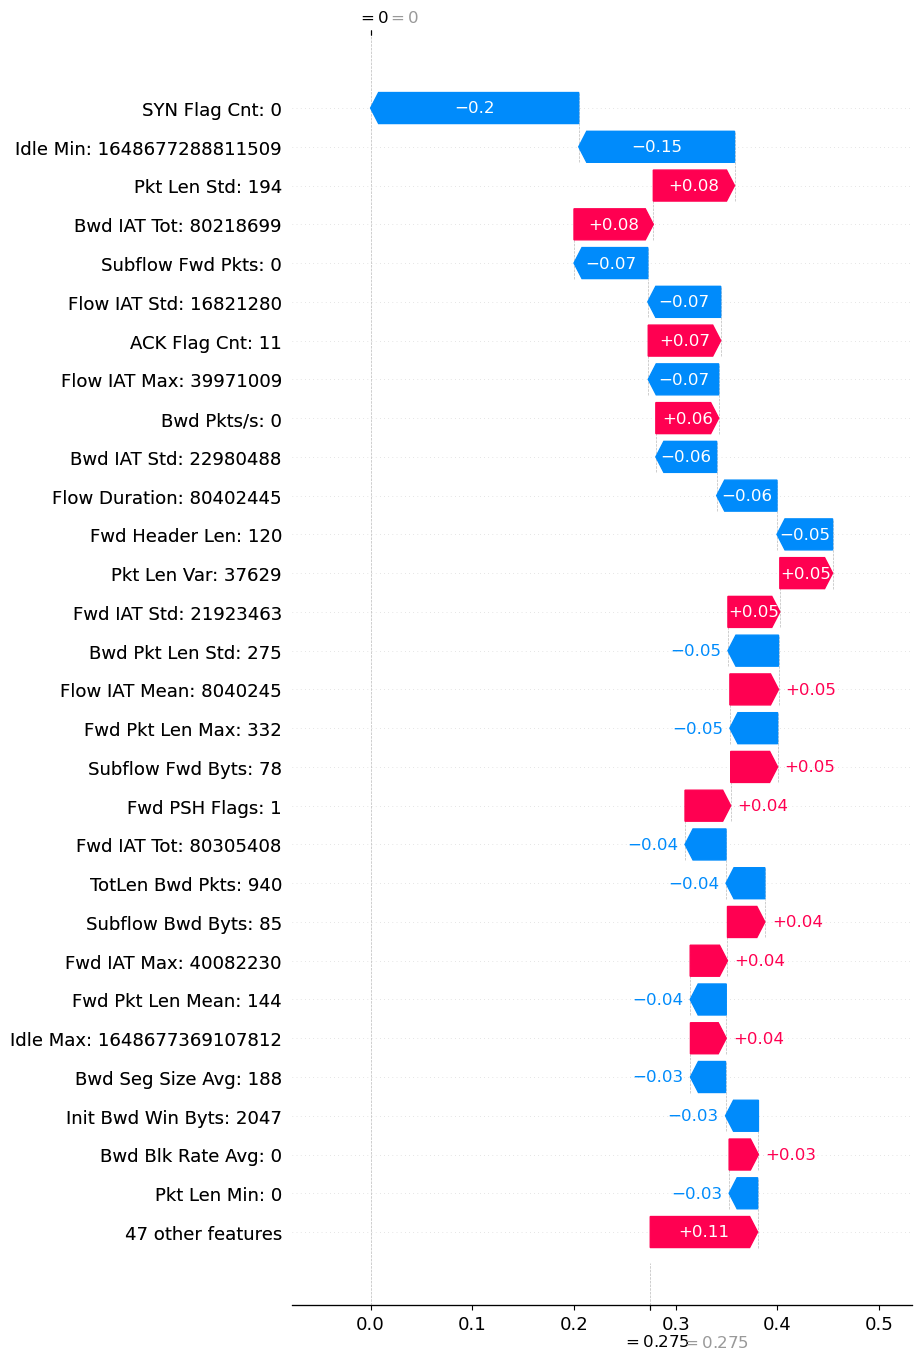

In [32]:
feature = [a + ": " + str(int(b)) for a,b in zip(features, data1[num].round(0))]

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[num],feature_names=feature, max_display=30)


Evil


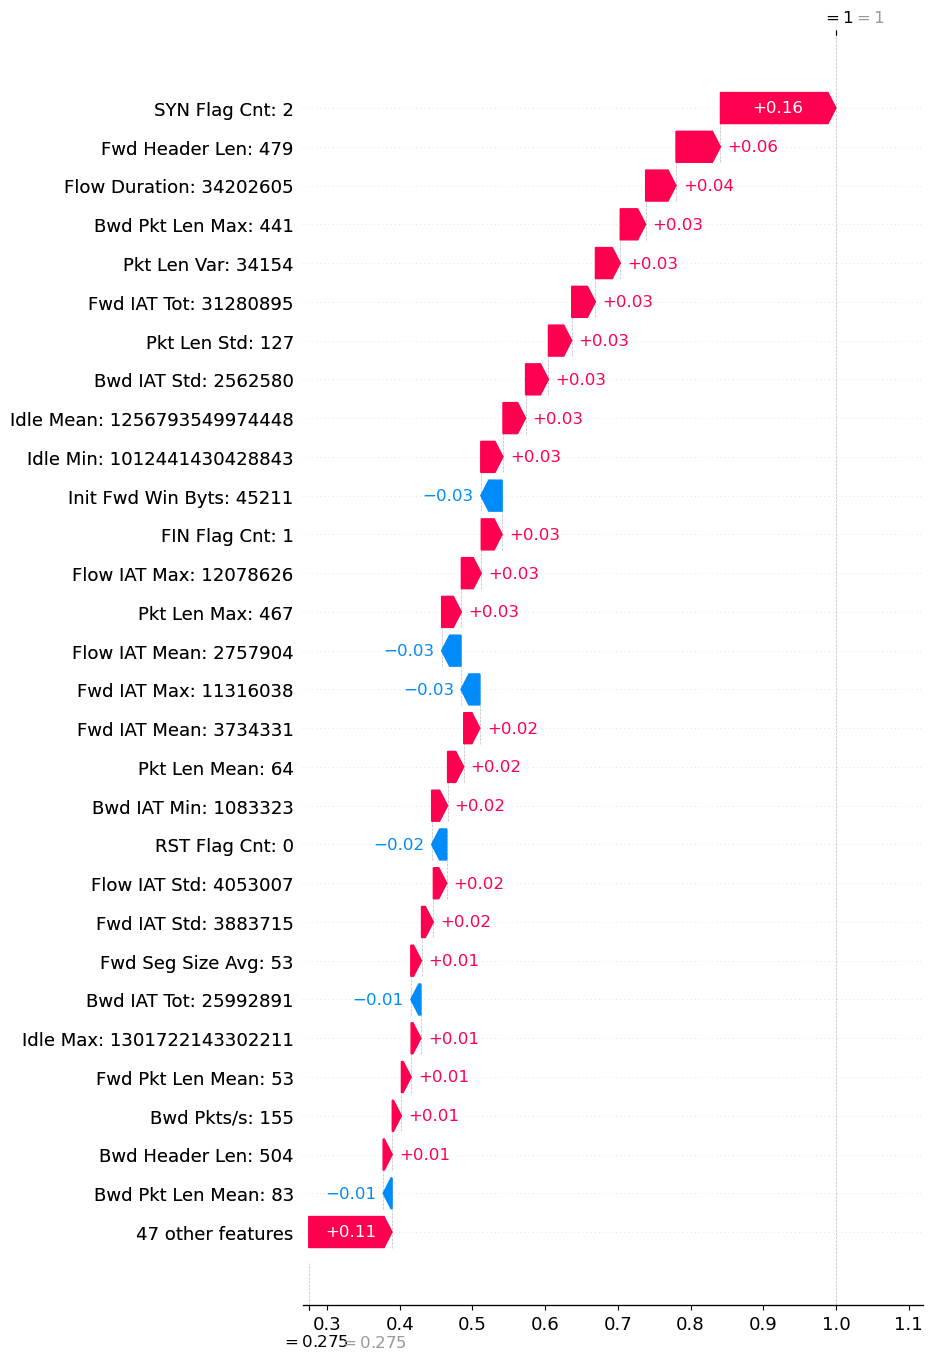

In [33]:
#0-Bening
#1-attacks
nuevo_shap=shap_values[0]*0
nuevo_data = data1[0]*0
acum=0
ata=1
margen=0.2
for i in range(size):
    suma=shap_values[i].sum()+explainer.expected_value
    if  (suma > (ata-abs(margen)))  and (suma < (ata+abs(margen))):
        nuevo_shap=nuevo_shap+shap_values[i]
        nuevo_data=nuevo_data+data1[i]
        acum=acum+1
nuevo_shap=nuevo_shap/acum
nuevo_data=nuevo_data/acum

feature = [a + ": " + str(int(b)) for a,b in zip(features, nuevo_data.round(0))]
print(Labels[ata])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, nuevo_shap,feature_names=feature, max_display=30)

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree


In [83]:
#clf = tree.DecisionTreeClassifier(random_state=0)
n_estimators=200
clf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,max_depth=2)
#    max_features
clf = clf.fit(X_trainArr,Y_train)
#Con 3    0.92
#COn 04   0.96097880

In [84]:
Y_predtree=clf.predict(X_trainArr)
LabelsArr = np.array(Labels)
y_testree1 = []
for i in range(0, Y_train.size):
        if Y_train[i] == 1:
            y_testree1.append("Evil")
        else:
            y_testree1.append("Benign")
y_predtree1 = []
for i in range(0, Y_predtree.size):
        if Y_predtree[i] == 1:
            y_predtree1.append("Evil")
        else:
            y_predtree1.append("Benign")

In [85]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))
accuracy_modelo=accuracy_score(Y_train, Y_predtree)

              precision    recall  f1-score   support

      Benign  0.89103198 0.99243090 0.93900196    121679
        Evil  0.98075155 0.76062890 0.85677770     61695

    accuracy                      0.91444261    183374
   macro avg  0.93589176 0.87652990 0.89788983    183374
weighted avg  0.92121755 0.91444261 0.91133814    183374



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

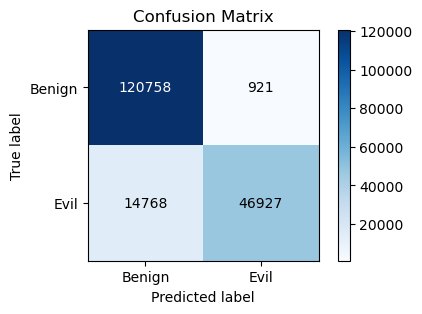

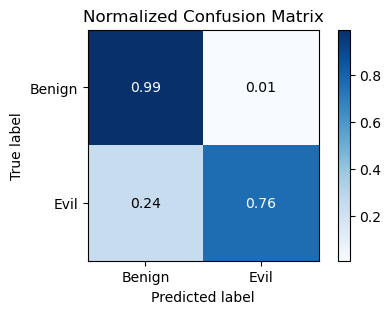

In [86]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1)
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True)

In [87]:
Y_predtree=clf.predict(X_testArr)
LabelsArr = np.array(Labels)
y_testree1 = []
for i in range(0, Y_test.size):
        if Y_test[i] == 1:
            y_testree1.append("Evil")
        else:
            y_testree1.append("Benign")
y_predtree1 = []
for i in range(0, Y_predtree.size):
        if Y_predtree[i] == 1:
            y_predtree1.append("Evil")
        else:
            y_predtree1.append("Benign")

In [88]:
print(classification_report(y_testree1, y_predtree1, digits=8, zero_division= "warn"))


              precision    recall  f1-score   support

      Benign  0.87169021 0.98891667 0.92661055     32391
        Evil  0.96246340 0.66127874 0.78393800     13920

    accuracy                      0.89043640     46311
   macro avg  0.91707681 0.82509771 0.85527427     46311
weighted avg  0.89897450 0.89043640 0.88372653     46311



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

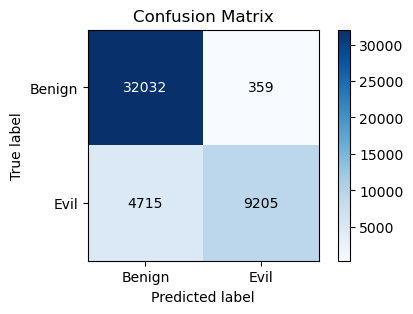

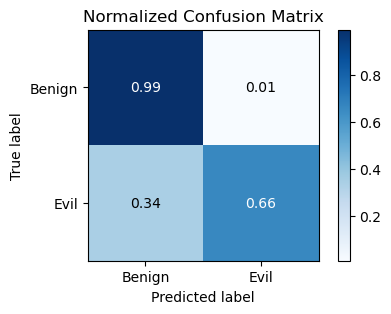

In [89]:
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1)
skplt.metrics.plot_confusion_matrix(y_testree1, y_predtree1, normalize= True)

100%|██████████| 200/200 [00:17<00:00, 11.11it/s]


Text(0.5, 0.98, 'Arbol numero: 70 Precision test: 0.941 Precision entrenamiento: 0.92')

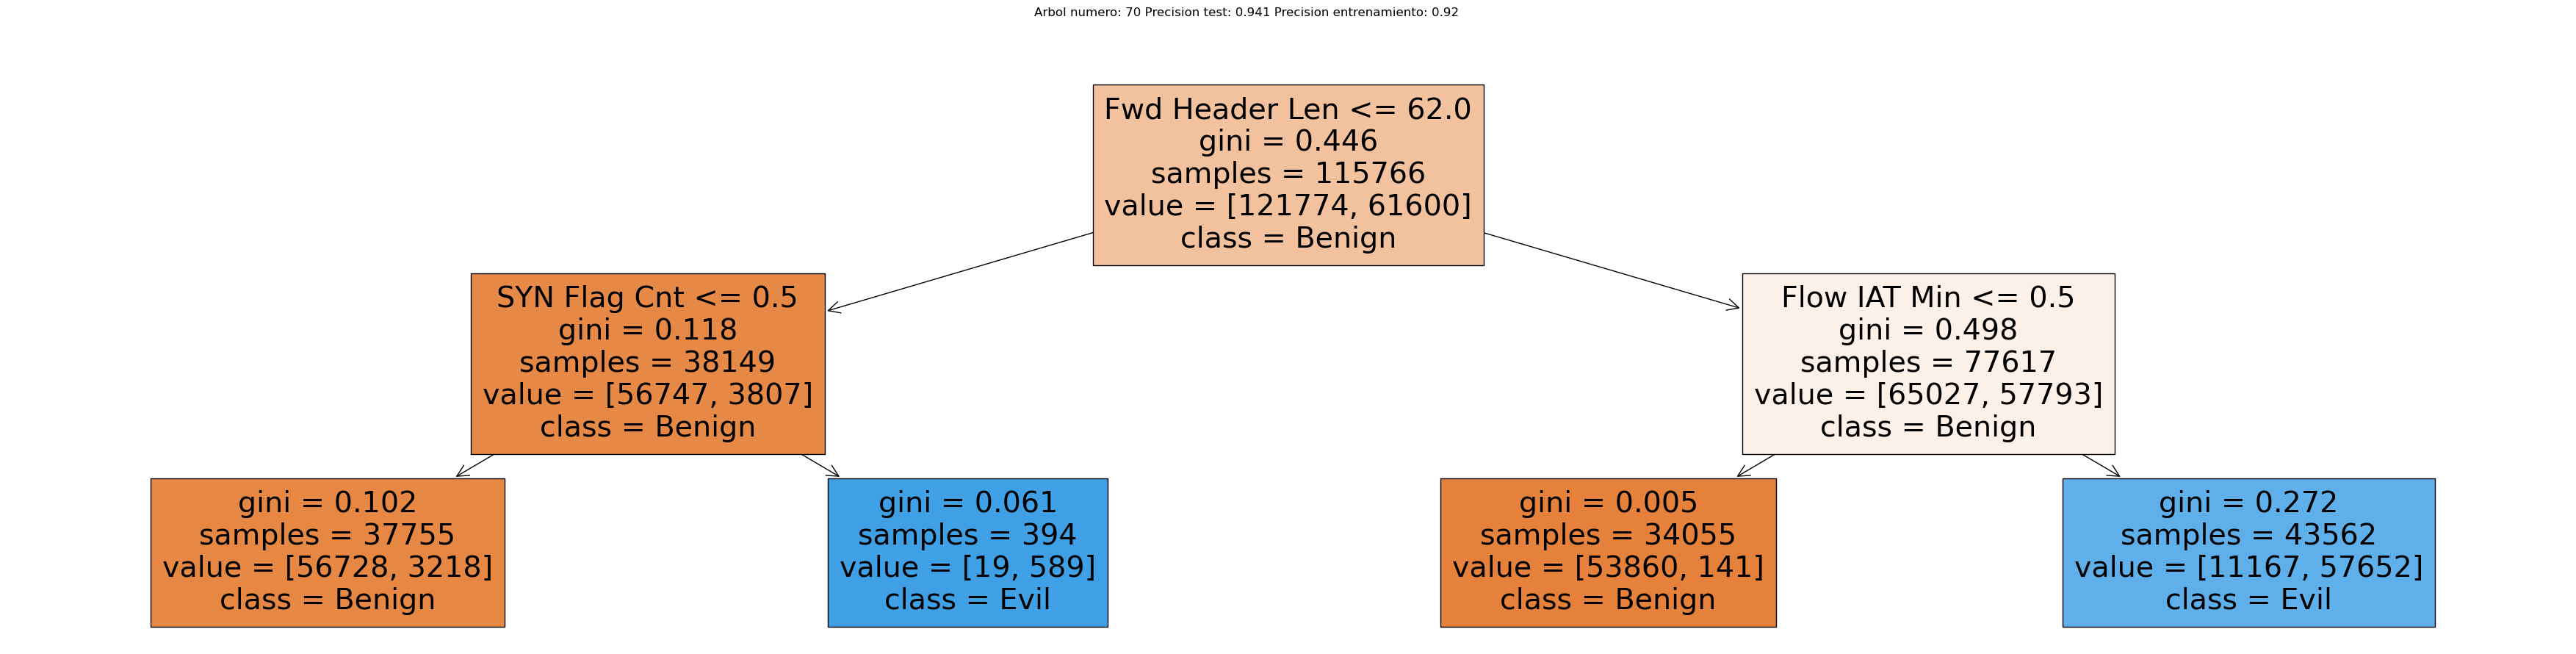

In [90]:
#plt.plot_tree(clf, feature_names=features,  class_names=Labels,filled=True)
from matplotlib.backends.backend_pdf import PdfPages
accuracy_ant=0
accuracy_med=0
accuracy_pon=0
accuracy_pon_ant=0
best=0
dist_ant=1000
from tqdm import tqdm
for i in tqdm(range(n_estimators)):
    aux_clf = clf.estimators_[i]
    y_pred_train=aux_clf.predict(X_trainArr)
    y_pred_test=aux_clf.predict(X_testArr)
    accuracy=accuracy_score(Y_test, y_pred_test)
    
    accuracy_train=accuracy_score(Y_train, y_pred_train)
    accuracy_pon = accuracy_train*accuracy
    
    dist=abs(accuracy_modelo-accuracy)
    
    if accuracy_pon > accuracy_pon_ant:
        pon=i
        accuracy_pon_ant=accuracy_pon
        accuracy_pon_train = accuracy_train
        accuracy_pon_test = accuracy
        
    if accuracy > accuracy_ant:
        best = i
        accuracy_ant=accuracy
        
    if dist < dist_ant:
        med = i
        accuracy_med=accuracy
        dist_ant = dist

aux_clf = clf.estimators_[med]
y_pred_test=aux_clf.predict(X_testArr)        
accuracy=accuracy_score(Y_test, y_pred_test)    
accuracy_med=accuracy



fig3 = plt.figure(figsize=(45,10))
_ = tree.plot_tree(clf.estimators_[pon], feature_names=features,  class_names=Labels,filled=True)



fig3.suptitle('Arbol numero: '+str(pon)+' Precision test: '+ str(round(accuracy_pon_test,3)) +' Precision entrenamiento: '+ str(round(accuracy_pon_train,3)))
#fig3.savefig("decistion_tree_pon.pdf")

In [57]:
model = tree.DecisionTreeClassifier(random_state=0,max_depth=2)
#    max_features
model = model.fit(X_trainArr,Y_train)


In [44]:
Y_pred_test=model.predict(X_trainArr)
accuracy=accuracy_score(Y_train, Y_pred_test)
print("precision entrenamiento",accuracy)
y_pred_test=model.predict(X_testArr)
accuracy=accuracy_score(Y_test, y_pred_test)
print("precision test",accuracy)

precision entrenamiento 0.9166893888991896
precision test 0.9409643497225281


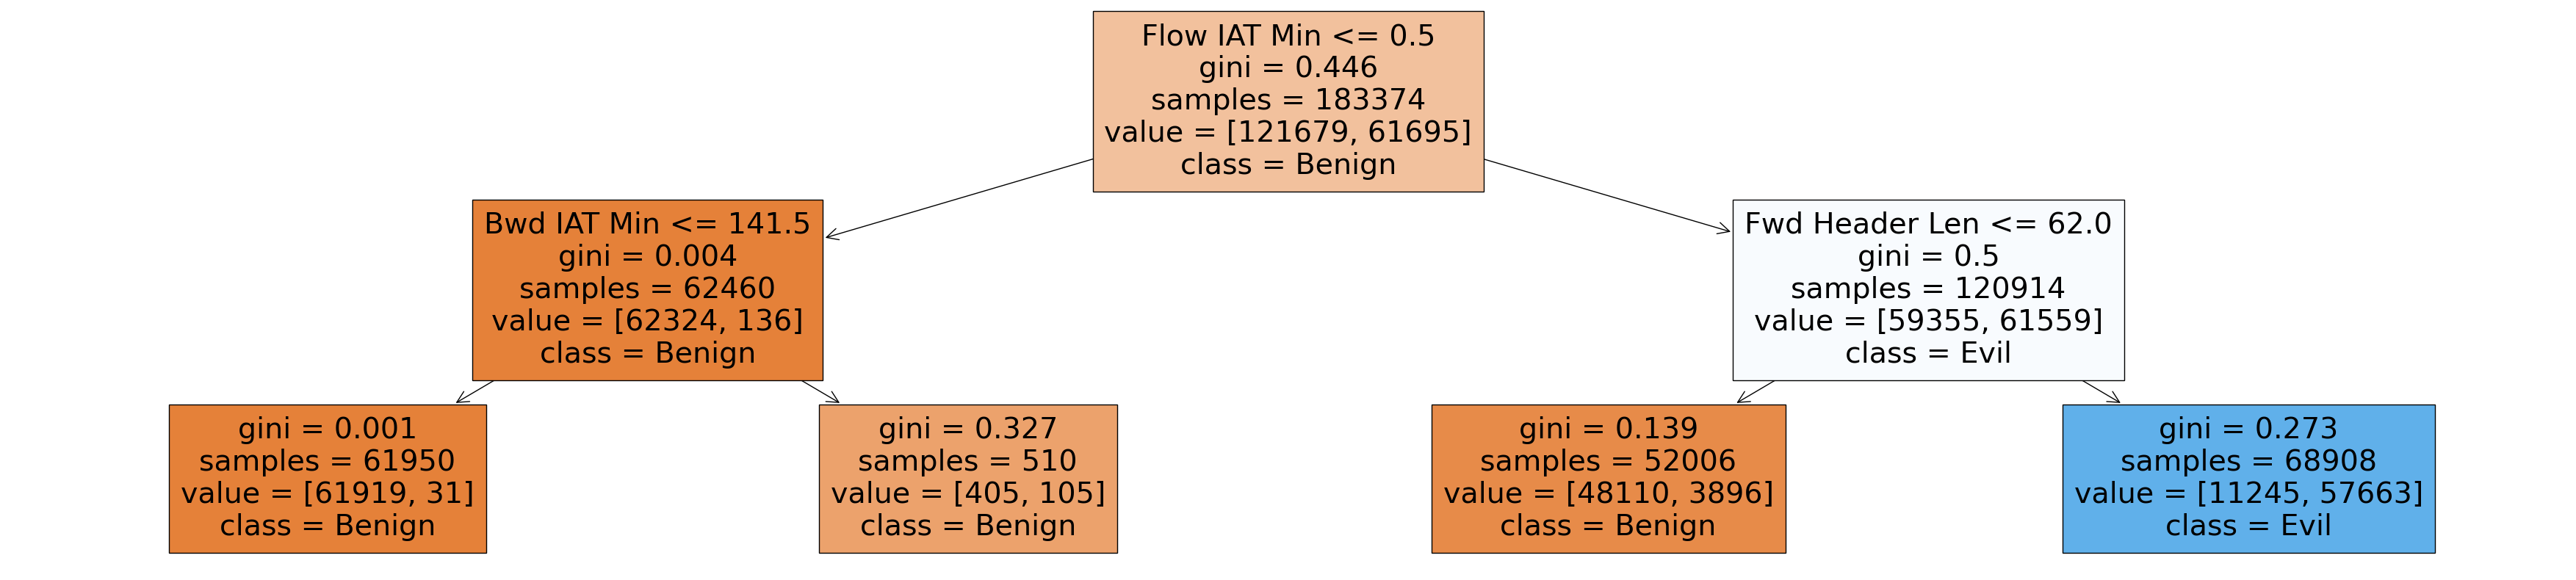

In [45]:
fig2 = plt.figure(figsize=(45,10))
_ = tree.plot_tree(model, feature_names=features,  class_names=Labels,filled=True)

fig.suptitle('Arbol numero: normal '+' Precision: '+ str(round(accuracy,3)))
fig.savefig("decistion_tree_normal.pdf")